Gráfico de Vítimas por gênero dos anos de 2015 a 2020, em todas as regiões nos crimes de Homicídio doloso, Lesão corporal seguida de morte e Latrocínio

Por: Larissa e Letícia

In [1]:
import plotly.express as px  # essa biblioteca foi escolhida por possuir uma função chamada path
import pandas as pandas
from plotly.offline import plot

In [2]:
data1 = pandas.read_csv("vitimas.csv", sep=";")  # ---------- lê a base de dados e armazena na variável
data1_array = data1.values  # ---------- lê e armazena cada linha da base de dados como uma lista
data2 = pandas.read_csv("regioesbrasileiras.csv", sep=";")
data2_array = data2.values

uf = []
crime = []
ano = []
genero = []
vitimas = []
regiaos = []
ufreg = []

In [3]:

# separando cada coluna a ser usada da base de dados em listas
# ordem das listas [uf, crime, ano, mês, genero, vitimas]
#                   0     1     2    3     4        5
for linha in data1_array:
    # para não pegar o ano de 2021
    if linha[2] != 2021:
        uf.append(linha[0])
        crime.append(linha[1])
        ano.append(linha[2])
        genero.append(linha[4])
        vitimas.append(linha[5])

In [4]:

# separando as regiões e estados respectivos em listas
for linha in data2_array:
    regiaos.append(linha[0])
    ufreg.append(linha[1])

In [5]:

# definindo de qual regiao é cada estado da lista uf
regiao = []
for j in uf:  # loop para passar por cada estado da lista uf
    count = 0
    for k in ufreg:  # loop para passar por cada estado da lista ufreg
        if j == k:  # vai comparar se o estado da lista uf é igual ao estado da lista ufreg
            regiao.append(regiaos[count])  # se forem iguais, vai adicionar a regiao que esta na mesma posição
        count += 1  # que o estado ufreg a uma nova lista contendo todas as regioes,
        # a posição na lista esta sendo definida pelo contador

ano = list(map(str, ano))  # muda a lista de anos de inteiro para string, pois para o gráfico precisa ser strings


In [6]:

# mudando alguns itens da lista para nomes menores
# percorre os itens da lista, aqueles em que o if for verdadeiro ele troca pelo novo valor informado (informação antes do if)
crime = ["Ls. Cp. sg. Morte" if value == "Lesão corporal seguida de morte" else value for value in crime]
crime = ["Latrocínio" if value == "Roubo seguido de morte (latrocínio)" else value for value in crime]
genero = ["Sexo NI" if value == "Não informado" or value == "Sem Informação" else value for value in genero]


In [7]:

# dicionario do banco de dados a ser usado no gráfico, cada um representa uma lista criada
dados = dict(crime=crime, ano=ano, regiao=regiao, genero=genero, vitimas=vitimas)

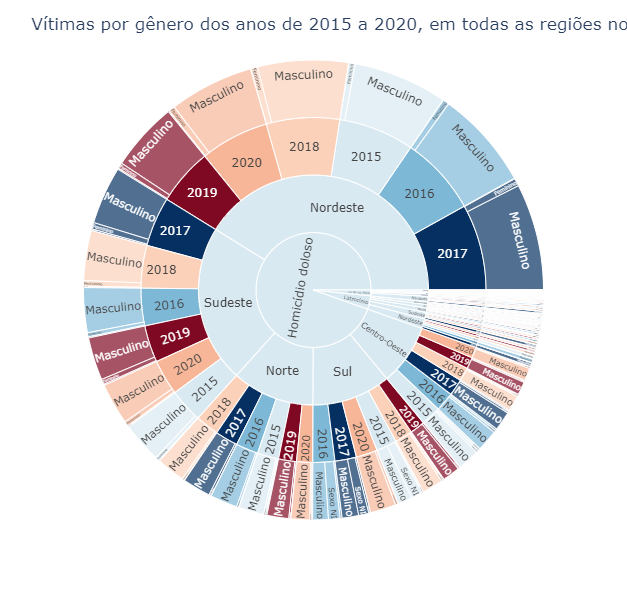

In [8]:
# grafico, o path mostra a ordem hierárquica do gráfico, o primeiro é o nível um, o segundo o nível dois,...
# o segundo nível está dentro do primeiro, o terceiro dentro do segundo que está dentro do primeiro,...
# o path vai percorrer toda a lista informada e juntar todos os iguais e seus respectivos valores
fig = px.sunburst(dados, path=['crime', 'regiao', 'ano', 'genero'], values='vitimas',
                  color='ano',  # define que a cor do nível que está o ano será mudada
                  color_discrete_sequence=["rgb(217, 233, 241)", "rgb(247, 182, 152)", "rgb(127, 8, 35)",
                                           "rgb(251, 209, 186)", "rgb(126, 184, 215)", "rgb(5, 48, 97)",
                                           "rgb(217, 233, 241)"]  # define a ordem das cores a serem mudadas
                  )

fig.update_layout(
    height=600,  # tamanho do gráfico em px
    title={"text": "Vítimas por gênero dos anos de 2015 a 2020, em todas as regiões nos crimes de Homicídio doloso, Lesão corporal seguida de morte e Latrocínio"}  # título
)